In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Datadirectory="dataSet/trainingData"

In [3]:
Classes=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26"]

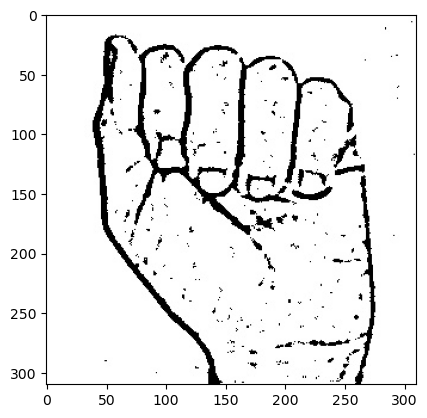

In [4]:
for category in Classes:
    path=os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break;
    break;

Removing Noise from the Image

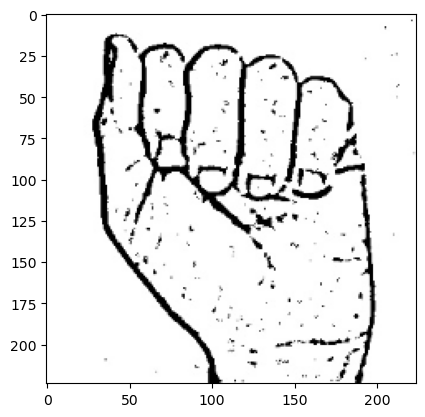

In [5]:
img_size=224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

read all the images and converting them into array


In [6]:
training_Data=[]
def create_training_Data():
    for category in Classes:
        path=os.path.join(Datadirectory,category)
        class_num= Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                # plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,class_num])
                # plt.show()
            except Exception as e:
                pass

In [7]:
create_training_Data()

In [8]:
print(len(training_Data))

12380


In [9]:
import random
random.shuffle(training_Data)

In [10]:
X=[]
y=[]
for features,label in training_Data:
    X.append(features)
    y.append(label)
X=np.array(X).reshape(-1,img_size,img_size,3)

In [11]:
X.shape

(12380, 224, 224, 3)

In [12]:
X=X/255.0

In [13]:
y[1000]

6

In [14]:
Y=np.array(y)

In [15]:
Y.shape

(12380,)

Deep learing model for training - Transfer Learning

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [17]:
model = tf.keras.applications.MobileNetV2()

In [18]:
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

Transfer Learning -Tuning,weights will start from last check point

In [19]:
base_input = model.layers[1].input

In [20]:
base_output= model.layers[-2].output

In [21]:
base_output

<KerasTensor shape=(None, 1280), dtype=float32, sparse=False, name=keras_tensor_154>

In [29]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Dense(26,activation='softmax')(final_output)

In [30]:
final_output

<KerasTensor shape=(None, 26), dtype=float32, sparse=False, name=keras_tensor_163>

In [31]:
new_model = keras.Model(inputs = base_input,outputs= final_output)

In [32]:
new_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,431,898 (9.28 MB)

 Trainable params: 2,397,786 (9.15 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [33]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [34]:
new_model.fit(X,Y, epochs=5)

Epoch 1/5
387/387 ━━━━━━━━━━━━━━━━━━━━ 1025s 3s/step - accuracy: 0.9254 - loss: 0.2914
Epoch 2/5
387/387 ━━━━━━━━━━━━━━━━━━━━ 979s 3s/step - accuracy: 0.9853 - loss: 0.0591
Epoch 3/5
387/387 ━━━━━━━━━━━━━━━━━━━━ 1013s 3s/step - accuracy: 1.0000 - loss: 7.7069e-05
Epoch 4/5
387/387 ━━━━━━━━━━━━━━━━━━━━ 1005s 3s/step - accuracy: 1.0000 - loss: 1.0375e-04
Epoch 5/5
387/387 ━━━━━━━━━━━━━━━━━━━━ 1008s 3s/step - accuracy: 0.9642 - loss: 0.1554


In [35]:
new_model.save('my_model93p33.h5')

In [36]:
new_model.fit(X,Y, epochs=2)

Epoch 1/2
387/387 ━━━━━━━━━━━━━━━━━━━━ 977s 3s/step - accuracy: 0.9998 - loss: 0.0013
Epoch 2/2
387/387 ━━━━━━━━━━━━━━━━━━━━ 974s 3s/step - accuracy: 1.0000 - loss: 8.1302e-05


In [37]:
new_model.save('my_model93p34.h5')

In [31]:
# new_model.fit(X,Y, epochs=5)

Epoch 1/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 512s 3s/step - accuracy: 0.9718 - loss: 0.0853
Epoch 2/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 514s 3s/step - accuracy: 0.9641 - loss: 0.1009
Epoch 3/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 497s 2s/step - accuracy: 0.9614 - loss: 0.1187
Epoch 4/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 495s 2s/step - accuracy: 0.9741 - loss: 0.0699
Epoch 5/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 519s 3s/step - accuracy: 0.9698 - loss: 0.0850


In [29]:
# new_model.save('Final_model93p35.h5')

In [38]:
new_model= tf.keras.models.load_model('my_model93p34.h5')

In [44]:
frame=cv2.imread("okay-hand-sign.jpg")

In [45]:
frame.shape

(1200, 1200, 3)

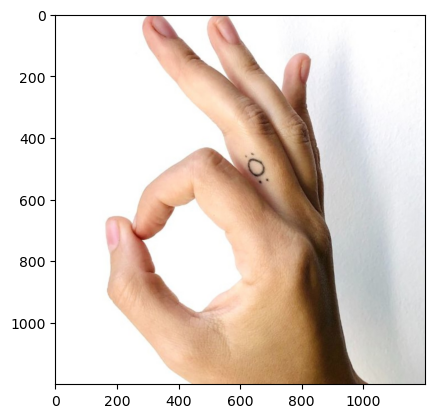

In [46]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [57]:
handCascade= cv2.CascadeClassifier(cv2.data.haarcascades+'hand.xml')

In [58]:
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [67]:
# Load hand cascade classifier
handCascade = cv2.CascadeClassifier('hand.xml')

# Detect hands in the grayscale image
hands = handCascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

# Loop through detected hands
for (x, y, w, h) in hands:
    # Extract ROI for the hand
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    
    # Draw rectangle around the hand
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
    # Detect sub-hands if any
    sub_hands = handCascade.detectMultiScale(roi_gray)
    
    # Check if sub-hands are detected
    if len(sub_hands) == 0:
        print("Hand not detected")
    else:
        # Extract each sub-hand
        for (ex, ey, ew, eh) in sub_hands:
            hand_roi = roi_color[ey:ey+eh, ex:ex+ew]


In [70]:
# Loop through detected hands
for (x, y, w, h) in hands:
    # Extract ROI for the hand
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    
    # Draw rectangle around the hand
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
    # Detect sub-hands if any
    sub_hands = handCascade.detectMultiScale(roi_gray)
    
    # Check if sub-hands are detected
    if len(sub_hands) == 0:
        print("Hand not detected")
    else:
        # Extract each sub-hand
        for (ex, ey, ew, eh) in sub_hands:
            hand_roi = roi_color[ey:ey+eh, ex:ex+ew]
            
            # Process hand_roi if it's not empty or invalid
            if hand_roi is not None and hand_roi.shape[0] > 0 and hand_roi.shape[1] > 0:
                final_image = cv2.resize(hand_roi, (224, 224))
                final_image = np.expand_dims(final_image, axis=0)
                final_image = final_image / 255.0
            else:
                print("Error: Hand ROI is empty or invalid")


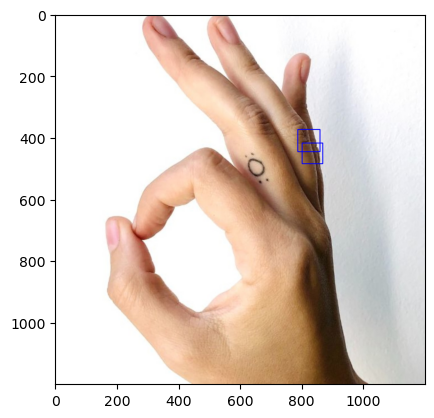

In [71]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [72]:
if hand_roi is not None and hand_roi.shape[0] > 0 and hand_roi.shape[1] > 0:
    final_image = cv2.resize(hand_roi, (224, 224))
    final_image = np.expand_dims(final_image, axis=0)
    final_image = final_image / 255.0
else:
    print("Error: Hand ROI is empty or invalid")


NameError: name 'hand_roi' is not defined

In [65]:
if hand_roi is not None and hand_roi.shape[0] > 0 and hand_roi.shape[1] > 0:
    final_image = cv2.resize(hand_roi, (224, 224))
    final_image = np.expand_dims(final_image, axis=0)
    final_image = final_image / 255.0
else:
    print("Error: Face ROI is empty or invalid")

NameError: name 'hand_roi' is not defined

In [39]:
Predictions= new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [40]:
Predictions[0]

array([0.17298664, 0.09013592, 0.1938352 , 0.1701339 , 0.16483544,
       0.09462041, 0.11345249], dtype=float32)

In [41]:
np.argmax(Predictions)

2

In [ ]:
import cv2
parth="haarcascade_frontalface_default.xml"
font_scale=1.5
font=cv2.FONT_HERSHEY_PLAIN
rectangle_bgr=(255,255,255)
img=np.zeros((500,500))
text="some text in the box!"
(text_width,text_height)=cv2.getTextSize(text,font,fontScale=font_scale,thickness=1)[0]
text_offset_x=10
text_offset_y = img.shape[0]-25
box_coords=((text_offset_x,text_offset_y),(text_offset_x+text_width+2,text_offset_y-text_height-2))
cv2.rectangle(img,box_coords[0],box_coords[0],rectangle_bgr,cv2.FILLED)
cv2.putText(img,text,(text_offset_x,text_offset_y),font,fontScale=font_scale,color=(0,0,0),thickness=1)
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    cap=cv2.VideoCapture(1)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
while True:
    ret,frame=cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces= faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = frame[y:y+h,x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess)==0:
            print("face not detected")
        else:
            for(ex,ey,ew,eh) in facess:
                face_roi=roi_color[ey:ey+eh,ex:ex+ew]
    final_image=cv2.resize(face_roi,(224,224))
    final_image= np.expand_dims(final_image,axis=0)
    final_image=final_image/255.0
    font = cv2.FONT_HERSHEY_SIMPLEX
    Predictions = new_model.predict(final_image)
    font_scale =1.5
    font = cv2.FONT_HERSHEY_PLAIN
    if(np.argmax(Predictions)==0):
        status="Angry"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    elif(np.argmax(Predictions)==1):
        status="Disgust"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    elif(np.argmax(Predictions)==2):
        status="Fear"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    elif(np.argmax(Predictions)==3):
        status="Happy"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    elif(np.argmax(Predictions)==4):
        status="Neutral"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    elif(np.argmax(Predictions)==5):
        status="Sad"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    else:
        status="Surprise"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    cv2.imshow("face emotion Recognition",frame)
    if cv2.waitKey(2)& 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━